#A) 
Los siguientes datos fueron extraidos de un [perfil real de Instragram](https://www.instagram.com/paulacano24/):

https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json

Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine
1. La velocidad inicial de incremento de seguidores en `followers/hour`
1. La aceleración constante en `followers/hour**2`
1. El número máximo de seguidores que alcanzaría el perfil
1. La fecha en la que se alcanzaría dicho máximo


In [1]:
### LIBRERIAS ###

#=================================================
import scipy.misc as sm
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sympy import init_printing
from scipy import  optimize
from scipy import misc
from scipy import interpolate
from scipy import integrate
from scipy.integrate import quad
from sympy import simplify
from scipy.interpolate import CubicSpline
init_printing() 
#=================================================

###1. La velocidad inicial de incremento de seguidores en `followers/hour`

In [2]:
#Creamos un Data Frame con los datos
df = pd.read_json("https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json")

#Tomamos los datos en x and y 
X_ = df['hours']
Y_ = df['followers']

#Realizamos una interpolación para tener un polinomio de grado 2
coefs1 = np.polyfit(X_,Y_,2)
pol_1 = np.poly1d(coefs1)

#Derivamos en el punto inicial para hallar la velocidad inicial
vel_in = misc.derivative(pol_1,X_[0])
print("La velocidad inicial sería: {} followers/hour".format(vel_in))

print(pol_1)

df

La velocidad inicial sería: 8.552137792663416 followers/hour
           2
-0.002438 x + 8.552 x + 4.276e+04


,followers,date_time,hours
0,42696,2021-08-04 22:06:53.668,0.000000
1,42706,2021-08-04 23:06:56.517,1.000791
2,42716,2021-08-05 00:06:59.505,2.001621
3,42734,2021-08-05 01:07:02.174,3.002363
4,42749,2021-08-05 02:07:04.854,4.003107
...,...,...,...
615,47452,2021-09-02 12:29:21.834,686.374491
616,47486,2021-09-02 19:59:32.801,693.877537
617,47491,2021-09-02 20:59:50.542,694.882465
618,47493,2021-09-02 21:59:59.345,695.884910


###2. La aceleración constante en `followers/hour**2`

In [3]:
#Vectorizamos la función para derivar
array_derivative = np.vectorize(misc.derivative)

#Realizamos una interpolación para hallar la función que nos da la velocidad
f1 = CubicSpline(X_,Y_)                #Interpolación de la posición
v_ = array_derivative(f1,X_,dx=1E-10)  #Derivada numerica de la posición (velocidad)

coefs2 = np.polyfit(X_,v_,1)
pol_2 = np.poly1d(coefs2)              #funcion de la velocidad

"""
Como los datos se toman como si fuera una caida libre, eso quiere decir
que la aceleración es constante, es decir, es la misma para cualquier punto
"""

#Hallamos la aceleración
a = misc.derivative(pol_2,X_,dx=1E-10) 

#print(a) Descomentando esto podemos ver que efectivamente es la misma para todo punto

print("La aceleración sacado con derivadas sería: {} follower/hour^2".format(a[0]))

"""
El método anterior aunque en principio no veo errores en el codigo, 
si que puede ser algo impreciso al momento de derivar numericamente
por lo que, el valor real de la aceleracion
estaría dado de la siguiente manera:
"""
a1 = 2*coefs1[0]
print("Valor de la aceleración sacado directamente: ",a1)


La aceleración sacado con derivadas sería: -0.006288303211476887 follower/hour^2
Valor de la aceleración sacado directamente:  -0.0048752543859773


###3. El número máximo de seguidores que alcanzaría el perfil

Optimization terminated successfully.
         Current function value: -50262.136729
         Iterations: 2
         Function evaluations: 67
 
El número maximo de seguidores que alcanzaría el perfil 
sería en un tiempo t = 1754.1931387093475 h y su valor sería: 50262.136729011865 followers 



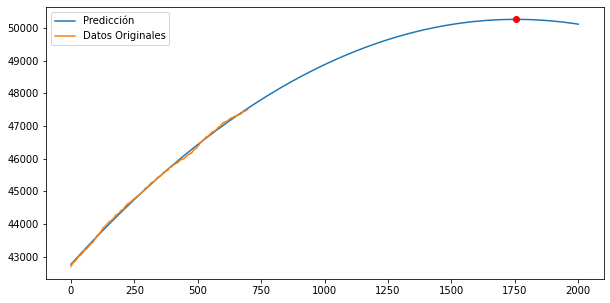

In [4]:
X_ = df['hours']
Y_ = df['followers']

coefs1 = np.polyfit(X_,Y_,2)
pol_1 = np.poly1d(coefs1)

max1 = optimize.fmin_powell(-pol_1,500)


X_2 = np.linspace(0,2000,len(Y_))

print(""" 
El número maximo de seguidores que alcanzaría el perfil 
sería en un tiempo t = {} h y su valor sería: {} followers 
""".format(max1,pol_1(max1)))

plt.figure(figsize=(10,5))
plt.plot(X_2,pol_1(X_2),label = "Predicción")
plt.plot(X_,Y_,label="Datos Originales")
plt.plot(max1,pol_1(max1),'ro')
plt.legend()
plt.show()


###4. La fecha en la que se alcanzaría dicho máximo

In [5]:
import datetime as dt

h = float(max1)
fecha = df['date_time'][0]+dt.timedelta(hours = h)

print("La fecha del maximo sería en: {}".format(fecha))


La fecha del maximo sería en: 2021-10-17 00:18:28.967354



#B) 
El período de  un pendulo de longitud $l$ oscilando a ángulos grandes  $\alpha$, está dado por
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
donde
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
es el período del mismo péndulo a pequeñas amplitudes. Culquier intento de evaluación numérico de esa integral debería fallar. Sin embargo, si hacemos el cambio de variable
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
obtenemos
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
que corresponde a una integral bien comportada. 
1. Escriba un programa que use la anterio integral para calcular el cociente  $T/T_0$ para ángulos enteros (en grados) $0^\circ \le\alpha \le 90^\circ$.  
1. Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente $T/T_0$, 
1. Haga un gráfico de $T/T_0$ como función de $\alpha$ (en grados). 
1. Explain the result when $\alpha = 0.$ 

###1. Escriba un programa que use la anterio integral para calcular el cociente 

In [6]:

#Definimos la función 
def q(α):
  α = np.asarray(α)    #volvemos a α un aray
  f = lambda φ: 1/np.sqrt(1-np.sin(α/2)**2 * np.sin(φ)**2)  #Definimos la función a integrar respecto a φ
  integ_array = np.vectorize(integrate.quad) #Vectorizamos el método de integración 
  I = integ_array(f,0,np.pi/2)[0]     #Realizamos la integral 

  return I*2/np.pi

#Comprobamos resultados  
Q = np.vectorize(q)
x = np.linspace(0,np.pi/2,100)
Q(x)

array([1.        , 1.00001573, 1.00006294, 1.00014163, 1.00025181,
       1.0003935 , 1.00056673, 1.00077153, 1.00100793, 1.00127597,
       1.00157571, 1.00190719, 1.00227047, 1.00266561, 1.00309268,
       1.00355177, 1.00404293, 1.00456628, 1.00512189, 1.00570986,
       1.0063303 , 1.00698332, 1.00766903, 1.00838755, 1.00913901,
       1.00992355, 1.01074131, 1.01159243, 1.01247707, 1.01339538,
       1.01434753, 1.0153337 , 1.01635406, 1.0174088 , 1.01849811,
       1.0196222 , 1.02078127, 1.02197553, 1.02320522, 1.02447055,
       1.02577177, 1.02710911, 1.02848285, 1.02989323, 1.03134052,
       1.03282501, 1.03434697, 1.03590671, 1.03750453, 1.03914074,
       1.04081567, 1.04252964, 1.04428299, 1.04607609, 1.04790929,
       1.04978296, 1.05169749, 1.05365326, 1.05565069, 1.05769018,
       1.05977217, 1.0618971 , 1.06406541, 1.06627758, 1.06853407,
       1.07083538, 1.07318201, 1.07557448, 1.07801332, 1.08049907,
       1.08303231, 1.0856136 , 1.08824354, 1.09092274, 1.09365

###2. Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente $T/T_0$, 

In [7]:
#Creamos un DataFrame
df2 = pd.DataFrame()
#Definimos las columnas del DataFrame
df2['α [rad]'] = x
df2['α [Grados (°)]'] = np.rad2deg(x)
df2['T/T0'] = Q(x)
df2

,α [rad],α [Grados (°)],T/T0
0,0.000000,0.000000,1.000000
1,0.015867,0.909091,1.000016
2,0.031733,1.818182,1.000063
3,0.047600,2.727273,1.000142
4,0.063467,3.636364,1.000252
...,...,...,...
95,1.507330,86.363636,1.163806
96,1.523196,87.272727,1.167832
97,1.539063,88.181818,1.171930
98,1.554930,89.090909,1.176099


###3. Haga un gráfico de $T/T_0$ como función de $\alpha$ (en grados). 

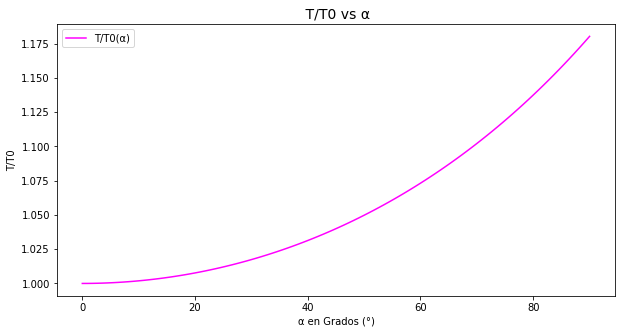

In [8]:
#Grafico
plt.figure(figsize = (10,5))
plt.title(' T/T0 vs α',size=14)
plt.plot(df2['α [Grados (°)]'],df2['T/T0'],'c',label = 'T/T0(α)',color="magenta")
plt.ylabel('T/T0')
plt.xlabel('α en Grados (°)')
plt.legend()
plt.show()

###4. Explain the result when $\alpha = 0.$ 

cuando $\alpha$ tiende a 0 entonces $sin^2(\frac{\alpha}{2})$ tiende a cero la expresion 

$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$

nos queda como 

$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1\right)^{\frac{1}{2}}}
$$

$$
T=\frac{2 T_{0}}{\pi} (\frac{\pi}{2}-0)
$$

$$
T=\frac{2 T_{0}}{\pi}\frac{\pi}{2}
$$

Luego $$T = T_{0}$$

y así $$\frac{T}{T_{0}} = 1 $$